<a href="https://colab.research.google.com/github/Tomas201513/Scraping_-_analysis_of_ETH_population_data_worldometers_with-Python/blob/main/Scraping_ETH_population_data_worldometers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)

# Scraping and Visualising Ethiopia Population Historical data from Worldometera site

In [17]:
pip install requests beautifulsoup4 pandas openpyxl
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
url = "https://www.worldometers.info/world-population/ethiopia-population/"
response = requests.get(url)
BeautifulSoup(response.content, 'html.parser').prettify()

'<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <title>\n   Ethiopia Population (2025) - Worldometer\n  </title>\n  <meta content="Population of Ethiopia: current, historical, and projected population, growth rate, immigration, median age, total fertility rate (TFR), population density, urbanization, urban population, country\'s share of world population, and global rank. Data tables, maps, charts, and live population clock" name="description"/>\n  <!-- Favicon -->\n  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>\n  <link href="/favicon/apple-icon-60x60.png" rel="app

In [67]:
table= soup.find("table", class_="table table-striped table-bordered table-hover table-condensed table-list")
#print(table)

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year</th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Migrants (net)</th><th>Median Age</th><th>Fertility Rate</th><th>Density (P/Km²)</th><th>Urban<br/> Pop %</th><th>Urban Population</th><th>Country's Share of<br/> World Pop</th><th>World Population</th><th>Ethiopia<br/>Global Rank</th></tr></thead><tbody> <tr> <td>2025</td> <td><strong>135,472,051</strong></td> <td>2.58 %</td> <td>3,412,284</td> <td>24,054</td> <td>19.1</td> <td>3.81</td> <td>135</td> <td>22.5 %</td> <td>30,487,323</td> <td>1.65 %</td> <td>8,231,613,070</td> <td>10</td> </tr> <tr> <td>2024</td> <td><strong>132,059,767</strong></td> <td>2.62 %</td> <td>3,368,075</td> <td>30,069</td> <td>18.9</td> <td>3.91</td> <td>132</td> <td>22.1 %</td> <td>29,204,015</td> <td>1.62 %</td> <td>8,161,972,572</td> <td>10</td> </tr> <tr> <td>2023</td> <td><strong>128,691,692</strong></td> <td>2.64

In [74]:
headers = table.find_all("th")
titles=[]
for i in headers:
  title=i.text
  titles.append(title)
print(titles)

['Year', 'Population', 'Yearly %  Change', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban Pop %', 'Urban Population', "Country's Share of World Pop", 'World Population', 'EthiopiaGlobal Rank']


In [69]:
data = []
for row in table.find_all("tr")[1:]:  # Skip the header row
    columns = [td.text.strip() for td in row.find_all("td")]
    data.append(columns)


In [83]:
df = pd.DataFrame(data, columns=titles)
#print(df)
#df.to_csv("Population of Ethiopia (2025 and historical).csv", index=False)
df.to_excel("Population_of_Ethiopia_2025_and_historical.xlsx", sheet_name="ethiopia_historical_population_data", index=False)


/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


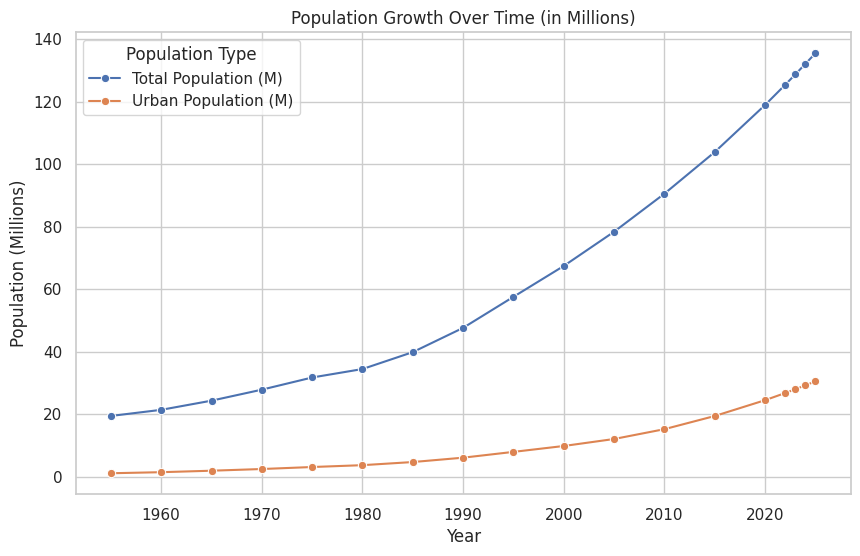

In [97]:
# Clean 'Population' and 'Urban Population' data by removing commas and converting to numeric
df['Population'] = df['Population'].replace({',': ''}, regex=True).astype(float)
df['Urban Population'] = df['Urban Population'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric if not already
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert to millions for better readability
df['Population (M)'] = df['Population'] / 1_000_000
df['Urban Population (M)'] = df['Urban Population'] / 1_000_000

# Sort by 'Year' in ascending order
df_sorted = df.sort_values(by='Year', ascending=True)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot both Population and Urban Population over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Population (M)', data=df_sorted, marker='o', label='Total Population (M)')
sns.lineplot(x='Year', y='Urban Population (M)', data=df_sorted, marker='o', label='Urban Population (M)')

# Customize the plot
plt.title('Population Growth Over Time (in Millions)')
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.legend(title='Population Type')  # Show a legend to differentiate the lines
plt.show()


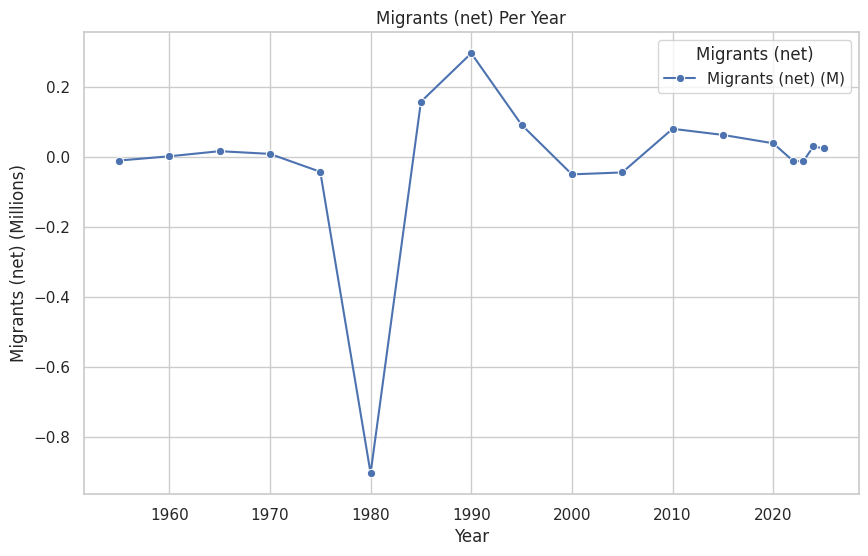

In [99]:
# Assuming df is already defined
df['Migrants (net)'] = df['Migrants (net)'].replace({',': ''}, regex=True).astype(float)

# Convert 'Year' to numeric if not already
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Migrants (net) (M)'] = df['Migrants (net)'] / 1_000_000  # Convert Migrants to millions

# Sort by 'Year' in ascending order
df_sorted = df.sort_values(by='Year', ascending=True)

# Plot Migrants (net) per Year on a separate plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Migrants (net) (M)', data=df_sorted, marker='o', label='Migrants (net) (M)')

# Customize the second plot
plt.title('Migrants (net) Per Year')
plt.xlabel('Year')
plt.ylabel('Migrants (net) (Millions)')
plt.legend(title='Migrants (net)')  # Show a legend for migrants
plt.show()
